## generating data

In [57]:
import numpy as np
import matplotlib.pyplot as plt

def write_pseudovoight(A,x,w=5,nu=0.5,spec_len=500,x_max=500):
    x_ = np.linspace(0,x_max-1,spec_len)
    y = A*( nu*np.pi/2/((x-x_)**2+(nu*np.pi/2)**2) \
        +(1-nu)*(np.exp(-4*np.log(2)*(x-x_)**2/w**2)) )
    return y

def add_noise(I,y,noise=0.1,spec_len=500):
    noise = np.random.normal(0, noise*(I), spec_len) # make some noise even if 0
    return y + noise

x_,y_ = (100,100)
mask = np.zeros((x_,y_))
mask[10:,10:] = 1



In [58]:
from tqdm import tqdm
import h5py
datapath = '/home/m3learning/Northwestern/Northwestern_link/model_tests/fake_pv_curves/'

fwhm, nu_ = 50, 0.7


In [59]:
def pv_area(I,w,nu):
   return I*w*np.pi/2/ ((1-nu)*(np.pi*np.log(2))**0.5 + nu)

with h5py.File(f'{datapath}fake_pv_data.h5','a') as f:
    for i in tqdm(range(20)):
        noise_ = i**(1.5) 
        try: dset = f[f'{noise_:06.3f}_noise']
        except: dset = f.create_dataset(f'{noise_:06.3f}_noise', shape=(100,100,500), dtype=np.float32)
        for x_ in range(dset.shape[0]):
            for y_ in range(dset.shape[1]):
                I = y_/5
                A = pv_area(I, w=fwhm, nu=nu_)
                if mask[x_, y_]:
                    dset[x_, y_] = add_noise(I,
                                            write_pseudovoight(A, x_*2, fwhm, nu_),
                                            noise = noise_)
                else: dset[x_, y_] = add_noise(I,
                                               np.zeros(dset.shape[2]),
                                               noise = noise_)
        f.flush()

  0%|          | 0/20 [00:00<?, ?it/s]

100%|██████████| 20/20 [00:24<00:00,  1.24s/it]


In [60]:
print(I, A, x_*2, noise_)

19.8 1360.890169252133 198 82.8190799272728


In [61]:
# i,x,y,s = 0,20,20,200
# noise_ = i**(1.5)
# with h5py.File(f'{datapath}fake_pv_data.h5','a') as f:
#     dset = f[f'{noise_}_noise'][:]
#     plt.imshow(dset[:,:,s],origin='lower')
#     plt.plot(y,x,'ro')
#     plt.colorbar()
#     plt.show()
#     plt.plot(dset[x,y,:])
#     plt.show()

In [62]:
with h5py.File(f'{datapath}fake_pv_data.h5','a') as f:
    dset_list = list(f.keys())

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
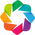

ValueError: Not a dataset (not a dataset)

In [64]:
import holoviews as hv
import panel as pn
from functools import lru_cache
import h5py

hv.extension('bokeh')
pn.extension('bokeh')

@lru_cache(maxsize=10)
def select_datacube(i):
    # noise_ = i**(1.5)
    with h5py.File(f'{datapath}fake_pv_data.h5','a') as f:
        return f[dset_list[i]][:]

def plot_datacube_img(i, s):
    datacube = select_datacube(i)
    # data_ = np.flipud(datacube[:, :, s])
    data_ = np.flipud(datacube[:, :, s].T)
    
    return hv.Image(data_, bounds=(0, 0, data_.shape[0], data_.shape[1]),
                    kdims=[hv.Dimension('x', label='X Position'), hv.Dimension('y', label='Y Position')],
                    vdims=[hv.Dimension('intensity', label='Intensity')],
                    ).opts(cmap='viridis', colorbar=True, clim=(0, datacube.max()),
                           width=350, height=300)

def plot_datacube_spectrum(i, x, y):
    datacube = select_datacube(i)
    return hv.Curve(datacube[x, y],
                    kdims=[hv.Dimension('spectrum', label='Spectrum Value')],
                    vdims=[hv.Dimension('intensity', label='Intensity')],
                    ).opts(width=350, height=300,
                           ylim=(0, datacube.max()), xlim=(0, 500),
                                     axiswise=True, shared_axes=False)

def show_dot(x, y): 
    return hv.Scatter([(x, y)]).opts( color='red', size=5, marker='o',
                                     axiswise=True, shared_axes=False)

def show_vline(s): 
    return hv.VLine(int(s)).opts(
        color='black', line_width=2,
        axiswise=True, shared_axes=False)
    

# Create interactive widgets
i_slider = pn.widgets.IntSlider(name='Noise level', value=0, start=0, end=19)
x_slider = pn.widgets.IntSlider(name='x', value=25, start=0, end=dset.shape[0]-1)
y_slider = pn.widgets.IntSlider(name='y', value=25, start=0, end=dset.shape[1]-1)
s_slider = pn.widgets.IntSlider(name='spectral value', value=0, start=0, end=499)

# Create dynamic maps for image and spectrum plots
img_dmap = hv.DynamicMap(pn.bind(plot_datacube_img, i=i_slider, s=s_slider))
spec_dmap = hv.DynamicMap(pn.bind(plot_datacube_spectrum, i=i_slider, x=x_slider, y=y_slider))

# Dynamic maps for the red dot and vertical line
dot_dmap = hv.DynamicMap(pn.bind(show_dot, x=x_slider, y=y_slider))
vline_dmap = hv.DynamicMap(pn.bind(show_vline, s=s_slider))

# Layout with widgets and plots
dmap = pn.Column(
    pn.Row(i_slider, s_slider),
    pn.Row(x_slider, y_slider),
    (img_dmap*dot_dmap + spec_dmap*vline_dmap).opts(shared_axes=True,axiswise=True)
)

dmap


In [44]:
dmap.clear()

## create sampler and custom collate

In [107]:
import torch
from torch.utils.data import Sampler

# without replacement
class Gaussian_Sampler(Sampler):
    def __init__(self, dset, batch_size, original_shape, gaussian_std=5, num_neighbors=10):
        """
        Custom Gaussian Sampler for stacked EELS dataset with multiple datacubes of different sizes.

        Args:
            dataset_shapes (list of tuples): List of shapes of each datacube in the dataset, e.g., [(128, 128, 2, 969), (140, 140, 2, 969), ...].
            batch_size (int): Number of total points per minibatch.
            gaussian_std (int): Standard deviation for Gaussian sampling around the first sampled point.
            num_neighbors (int): Number of additional points to sample around the first point. ( best if batch_size % num_neighbors == 0)
        """
        self.dset = dset
        self.batch_size = batch_size
        self.gaussian_std = gaussian_std
        self.num_neighbors = num_neighbors
        self.shape = original_shape
        
    def __iter__(self):
        """Return a batch of indices for each iteration."""
        self.batches = 0
        while self.batches < len(self)-1: # drop last
            batch = []

            while len(batch) < self.batch_size:
                ind = torch.randint(0, len(self.dset),(1,)).item()
                batch.append(ind)

                x, y = int(ind % self.shape[1]), int(ind / self.shape[0])  # find x,y coords
                
                neighbors = set()
                # Get neighbors around the selected point in the H*W flattened image
                while len(neighbors) < self.num_neighbors:
                    # Sample a shift from a normal distribution, apply it within the H*W flattened space
                    x_ = int(torch.randn(1).item() * self.gaussian_std)
                    y_ = int(torch.randn(1).item() * self.gaussian_std)
                    new_x, new_y = x + x_, y + y_
                    if not (0 <= new_x < self.shape[0] and 0 <= new_y < self.shape[1]):
                        continue  # skip if the new coordinates are out of bounds
                    if (new_x, new_y) in neighbors:
                        continue  # skip if the new coordinates are already in neighbors
                    neighbors.add((new_x, new_y))

                batch += [coord[1]*self.shape[0] + coord[0] for coord in neighbors]
                if len(batch) >= self.batch_size: break
            self.batches += 1
            
            yield batch[:self.batch_size]

    def __len__(self):
        """Return the number of batches per epoch."""
        # This can be adjusted based on the desired number of iterations per epoch
        return len(self.dset) // self.batch_size


def custom_collate_fn(batch): 
    # batch = [tuple(map(torch.tensor, elem)) for elem in batch[0]]
    # idx,data = zip(*batch)
    return torch.tensor(batch[0][0]), torch.tensor(batch[0][1])

class Indexing_Dataset(torch.utils.data.Dataset):
    def __init__(self, dset):
        self.dset = dset
        self.shape = dset.shape

    def __len__(self):
        return len(self.dset)

    def __getitem__(self, idx):
        return idx, self.dset[idx]

## Train model

In [108]:
import sys
sys.path.append('./../')
sys.path.append('./../../src/') # path to the m3_learning/src directory
%load_ext autoreload
%autoreload 2

from m3_learning.nn.STEM_AE_multimodal import STEM_AE as stem
from m3_learning.nn.STEM_AE_multimodal.Dataset import EELS_Gaussian_Sampler,custom_collate_fn, STEM_EELS_Dataset, EELS_Embedding_Dataset
import wandb

wandb.login()

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


True

In [110]:
with h5py.File(f'{datapath}fake_pv_data.h5','r') as f:
    dset_list = list(f.keys())

In [112]:
class fake_pv_FitterAutoencoder_1D(stem.FitterAutoencoder_1D):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def compile_model(self):
        """function that complies the neural network model
        """
        self.Fitter = stem.Multiscale1DFitter(function=self.function,
                                 x_data = self.dset,
                                 input_channels=self.dset.shape[1],
                                 num_params=self.num_params,
                                 num_fits=self.num_fits,
                                 limits=self.limits,
                                 device='cuda:0',
                                 flatten_from = 1,
                            )
        self.Fitter = self.Fitter.to(self.device)
        # sets the datatype of the model to float32
        self.Fitter.type(torch.float32)

        # sets the optimizers
        self.optimizer = torch.optim.Adam(
            self.Fitter.parameters(), lr=self.learning_rate
        )


In [114]:
for dset_name in dset_list[:1]:
    print(dset_name)
    with h5py.File(f'{datapath}fake_pv_data.h5','r') as f:
        dataset = Indexing_Dataset( f[dset_name][:].reshape(-1,1,500) )
        
    model = fake_pv_FitterAutoencoder_1D(function=stem.generate_pseudovoigt_1D,
                                        dset = dataset,
                                        input_channels=1,
                                        num_params=4,
                                        num_fits=1,
                                        limits=[1000, 500, 500], # A, mean, fwhm 
                                        device='cuda:0',
                                        learning_rate = 3e-5,
                                        folder=f'/home/m3learning/Northwestern/Northwestern_link/Northwestern_Multimodal_Checkpoints/fake_pv_curves/{dset_name}',
                                        # wandb_project='fit_noisy_pv_gaussian_batch_sampling',
                                        dataloader_sampler = Gaussian_Sampler,
                                        sampler_kwargs = {'dset': dataset, 
                                                        'batch_size': 100,
                                                        'gaussian_std': 5,
                                                        'original_shape': (100,100,500),
                                                        'num_neighbors': 20,},
                                        custom_collate_fn=custom_collate_fn,
                                    )    
    model.Train(dataset, epochs=100, batch_size=100, #minibatch_logging_rate=100,
                with_scheduler=False)

00.000_noise


  0%|          | 0/100 [1:38:55<?, ?it/s]


RuntimeError: Given groups=1, weight of size [8, 1, 7], expected input[1, 100, 500] to have 1 channels, but got 100 channels instead

In [101]:
debug

> /tmp/ipykernel_2749042/761201816.py(73)__getitem__()
     69     def __len__(self):
     70         return len(self.dset)
     71 
     72     def __getitem__(self, idx):
---> 73         return idx, self.dset[idx]

[9222, 9449.0, 9438.0, 9248.0, 8443.0, 9049.0, 9239.0, 8952.0, 9649.0, 9252.0, 9241.0, 9351.0, 9040.0, 9342.0, 9243.0, 8744.0, 9245.0, 8651.0, 9251.0, 9244.0, 9145.0, 1357, 911.0, 613.0, 1312.0, 915.0, 1014.0, 1314.0, 1605.0, 1413.0, 2013.0, 1316.0, 1415.0, 1108.0, 1419.0, 812.0, 1712.0, 1615.0, 1507.0, 1818.0, 1608.0, 1414.0, 316, 327.0, 629.0, 631.0, 534.0, 1330.0, 326.0, 132.0, 842.0, 1032.0, 28.000000000000014, 330.0, 328.0, 1528.0, 233.0, 131.0, 632.0, 332.0, 934.0, 828.0, 230.0, 7443, 7482.000000000001, 8082.000000000001, 7480.000000000001, 7894.000000000001, 8986.0, 7883.000000000001, 7190.000000000001, 7980.000000000001, 7790.000000000001, 6784.000000000001, 7194.000000000001, 8381.0, 7679.000000000001, 6878.000000000001, 7487.000000000001, 8085.000000000001, 8387.


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/home/m3learning/anaconda3/envs/northwestern/lib/python3.11/bdb.py", line 361, in set_quit
    sys.settrace(None)



In [ ]:
model1D = stem.FitterAutoencoder_1D(function=stem.generate_pseudovoigt_1D,
                                        dset = dset,
                                        input_channels=dset.eels_chs,
                                        num_params=4,
                                        num_fits=config.num_fits,
                                        limits=[1,dset.spec_len, dset.spec_len], # A, mean, fwhm 
                                        # TODO: do I have to change x axis so mean and fwhm aren't too different from the rest?
                                        device='cuda:0',
                                        learning_rate = 3e-5,
                                        folder=f'/home/m3learning/Northwestern/Northwestern_link/Northwestern_Multimodal_Checkpoints/l1l2_gaussian_sampler_unweighted_binning_f:{config.num_fits}_s:{config.gaussian_std}_n:{config.num_neighbors}',
                                        # wandb_project='AuCo_EELS_gaussian_sampler_sweep',
                                        dataloader_sampler = EELS_Gaussian_Sampler,
                                        sampler_kwargs = {'dset': dset, 
                                                        'batch_size': 128,
                                                        'gaussian_std': config.gaussian_std,
                                                        'num_neighbors': config.num_neighbors,},
                                        custom_collate_fn=custom_collate_fn,
                                    )

        # # Load checkpoint if exists (for resuming the run)
        # checkpoint_path = '/home/m3learning/Northwestern/Northwestern_link/Northwestern_Multimodal_Checkpoints/l1l2_gaussian_sampler_unweighted_binning/(2024-10-01)_epoch:0004_l1coef:0.0001_lr:0.00003_trainloss:0.2838.pkl'
        
        # if os.path.exists(checkpoint_path):
        #     print(f"Loading checkpoint from {checkpoint_path}")
        #     model1D.load_weights(checkpoint_path)
        #     model1D.load_loss_data(checkpoint_path)
        
        # Train the model
        model1D.Train( dset, batch_size=128, coef_1=5e-5, coef_5=5e-5, with_scheduler=False, 
                    epochs=10, 
                    minibatch_logging_rate=367, 
                    binning = True,
                    weight_by_distance=config.weighted_loss,
                    # wandb_init = {'id':'ted3soj9', 'resume':"resume"}
                    )

In [ ]:
# sweep_config = {
#     'method': 'grid',
#     'parameters': { 
#         'gaussian_std': {'values': [1,2,4]},
#         'num_neighbors': {'values': [8, 16, 32]},
#         'num_fits': {'values': [32,64,96]},
#         'weighted_loss': {'values': [False, True]},
#      }
#     }

In [17]:
# import wandb

# # Initialize the W&B API
# api = wandb.Api()

# # Fetch the runs associated with the specific sweep ID
# sweep_id = "o3w3f1yr"
# runs = api.sweep(f"zhang-xinqiao/AuCo_EELS_gaussian_sampler_sweep/{sweep_id}").runs

# # Create a set to store tested configurations
# tested_configs = set()
# run_ids = []
# # Loop through the prior runs and log their configurations
# for run in runs:
#     run_ids.append(run.id)
#     config = run.config
#     config_tuple = (config['gaussian_std'], config['num_neighbors'], config['num_fits'], config['weighted_loss'])
#     tested_configs.add(config_tuple)

# # Print out the tested configurations
# print("Tested Configurations:")
# for config in tested_configs:
#     print(config)

# for id in run_ids:
#     print(id)
# # You can now use `tested_configs` to avoid re-running the same configurations


In [18]:
# sweep_id = wandb.sweep(sweep_config, 
#                        project="AuCo_EELS_gaussian_sampler_sweep", 
#                        prior_runs=run_ids)

In [ ]:
import os
import threading
import time

def training_wrapper(config=None):
    # with wandb.init( project="AuCo_EELS_gaussian_sampler_sweep", 
    #                 config=config,
    #                 resume='must', 
    #                 id='ted3soj9',
    #                 resume_from='ted3soj9?_step=61') as run:
    with wandb.init(config=config):
        config = wandb.config
        # Check if the current config is in tested_configs
        current_config_tuple = (config.gaussian_std, config.num_neighbors, config.num_fits)
        if current_config_tuple in tested_configs:
            print(f"Configuration {current_config_tuple} has already been tested. Skipping this run.")
            return  # Skip this run if the config has been tested

        # Proceed with training if the configuration is new
        print(f"Testing new configuration: {current_config_tuple}")
        # Initialize the model
        model1D = stem.FitterAutoencoder_1D(function=stem.generate_pseudovoigt_1D,
                                        dset = dset,
                                        input_channels=dset.eels_chs,
                                        num_params=4,
                                        num_fits=config.num_fits,
                                        limits=[1,dset.spec_len, dset.spec_len], # A, mean, fwhm 
                                        # TODO: do I have to change x axis so mean and fwhm aren't too different from the rest?
                                        device='cuda:0',
                                        learning_rate = 3e-5,
                                        folder=f'/home/m3learning/Northwestern/Northwestern_link/Northwestern_Multimodal_Checkpoints/l1l2_gaussian_sampler_unweighted_binning_f:{config.num_fits}_s:{config.gaussian_std}_n:{config.num_neighbors}',
                                        # wandb_project='AuCo_EELS_gaussian_sampler_sweep',
                                        dataloader_sampler = EELS_Gaussian_Sampler,
                                        sampler_kwargs = {'dset': dset, 
                                                        'batch_size': 128,
                                                        'gaussian_std': config.gaussian_std,
                                                        'num_neighbors': config.num_neighbors,},
                                        custom_collate_fn=custom_collate_fn,
                                    )

        # # Load checkpoint if exists (for resuming the run)
        # checkpoint_path = '/home/m3learning/Northwestern/Northwestern_link/Northwestern_Multimodal_Checkpoints/l1l2_gaussian_sampler_unweighted_binning/(2024-10-01)_epoch:0004_l1coef:0.0001_lr:0.00003_trainloss:0.2838.pkl'
        
        # if os.path.exists(checkpoint_path):
        #     print(f"Loading checkpoint from {checkpoint_path}")
        #     model1D.load_weights(checkpoint_path)
        #     model1D.load_loss_data(checkpoint_path)
        
        # Train the model
        model1D.Train( dset, batch_size=128, coef_1=5e-5, coef_5=5e-5, with_scheduler=False, 
                    epochs=10, 
                    minibatch_logging_rate=367, 
                    binning = True,
                    weight_by_distance=config.weighted_loss,
                    # wandb_init = {'id':'ted3soj9', 'resume':"resume"}
                    )

In [ ]:
import threading
import time
import wandb

def training_wrapper_with_timeout(config=None, timeout=3*60*60):  # 3 hours in seconds
    def target():
        training_wrapper(config)
    
    thread = threading.Thread(target=target)
    thread.start()
    thread.join(timeout)
    
    if thread.is_alive():
        print("Training exceeded the time limit. Moving to the next run.")
        # Optionally, you can perform any cleanup here
        # Terminate the thread (not recommended in production as it can leave resources in an inconsistent state)
        # thread._stop()  # Use with caution
